<a href="https://colab.research.google.com/github/196h/marketing-performan/blob/main/E_Commerce_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ===========================
# E-Commerce Sales Analysis 2023-2024
# ===========================


### **1.Import Libraries and Data**

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import calendar



### **2. Read File and Clean Column Names**

In [4]:
df = pd.read_excel("/content/Ecommerce_Sales_2023_2024.xlsx")
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

**3. Convert Data Types and Handle Missing Values**

In [6]:
df["order_date"] = pd.to_datetime(df["order_date"], errors="coerce")

for col in ["quantity", "unit_price", "discount", "total_price"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

mask_missing = df["total_price"].isna() | (df["total_price"] == 0)
df.loc[mask_missing, "total_price"] = (
    df["quantity"] * df["unit_price"] * (1 - df["discount"].fillna(0))
)

### **4. Filter Data for 2023-2024**

In [7]:
df = df[(df["order_date"] >= "2023-01-01") & (df["order_date"] <= "2024-12-31")]
df["year"] = df["order_date"].dt.year
df["month"] = df["order_date"].dt.to_period("M").dt.to_timestamp()

### **5. Calculate KPIs**

In [10]:
total_sales = df["total_price"].sum()
orders_count = df["order_date"].nunique()
avg_order_value = df.groupby("order_id")["total_price"].sum().mean()

print("Total Sales:", total_sales)
print("Number of Order Days:", orders_count)
print("Average Order Value:", avg_order_value)

Total Sales: 2290526.11
Number of Order Days: 694
Average Order Value: 1145.2630549999997


### **7. Sales Share by Category (Pie Chart)**

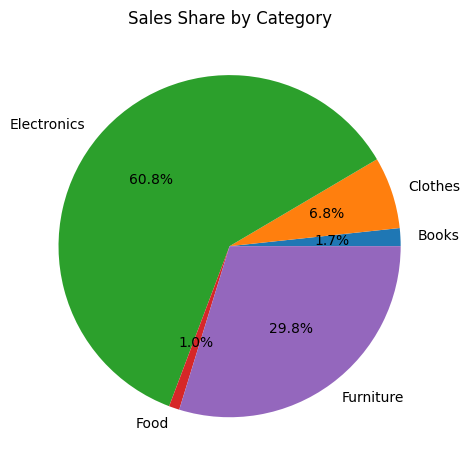

In [19]:

if "category" in df.columns:
    cat_sales = df.groupby("category")["total_price"].sum()
    cat_sales.plot(kind="pie", autopct="%1.1f%%", ylabel="", title="Sales Share by Category")
    plt.tight_layout()
    plt.show()

In [38]:
yearly_sales = df.groupby("year")["total_price"].sum()
growth = ((yearly_sales[2024] - yearly_sales[2023]) / yearly_sales[2023]) * 100
print(f"Year-over-Year Growth: {growth:.2f}%")

Year-over-Year Growth: 6.17%


### **8. Top 10 Products by Sales**

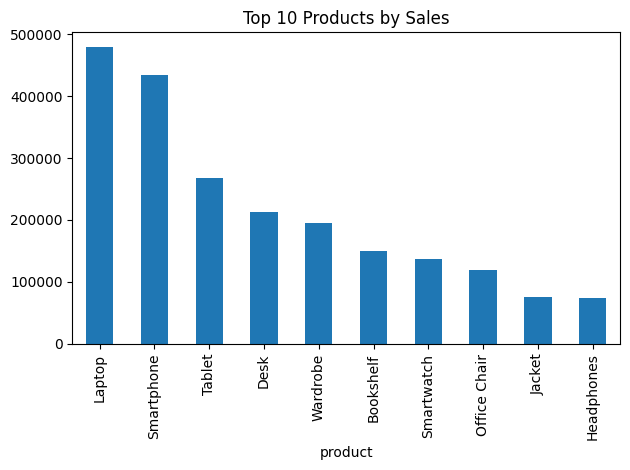

In [21]:
if "product" in df.columns:
    top_products = df.groupby("product")["total_price"].sum().sort_values(ascending=False).head(10)
    top_products.plot(kind="bar", title="Top 10 Products by Sales")
    plt.tight_layout()
    plt.show()


### **9. Rolling average for trend line**

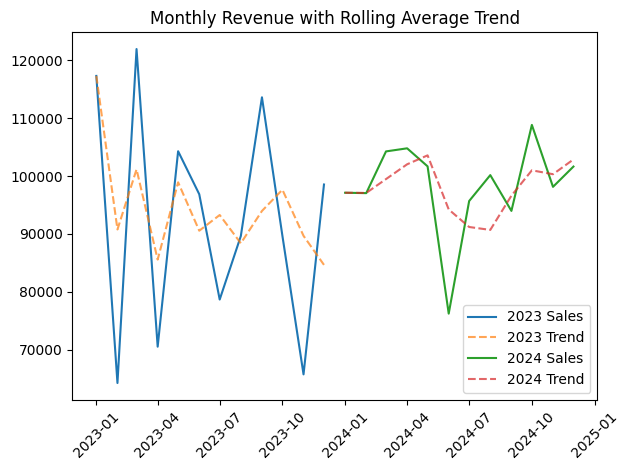

In [33]:
monthly_sales = df.groupby(["year", "month"])["total_price"].sum().reset_index()
monthly_sales["rolling_avg"] = monthly_sales.groupby("year")["total_price"].transform(lambda x: x.rolling(3, min_periods=1).mean())

plt.figure()
for y in monthly_sales["year"].unique():
    temp = monthly_sales[monthly_sales["year"] == y].sort_values("month")
    plt.plot(temp["month"], temp["total_price"], label=f"{y} Sales")
    plt.plot(temp["month"], temp["rolling_avg"], "--", alpha=0.7, label=f"{y} Trend")

plt.legend()
plt.title("Monthly Revenue with Rolling Average Trend")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **10. Sales Heatmap by Month and Year**

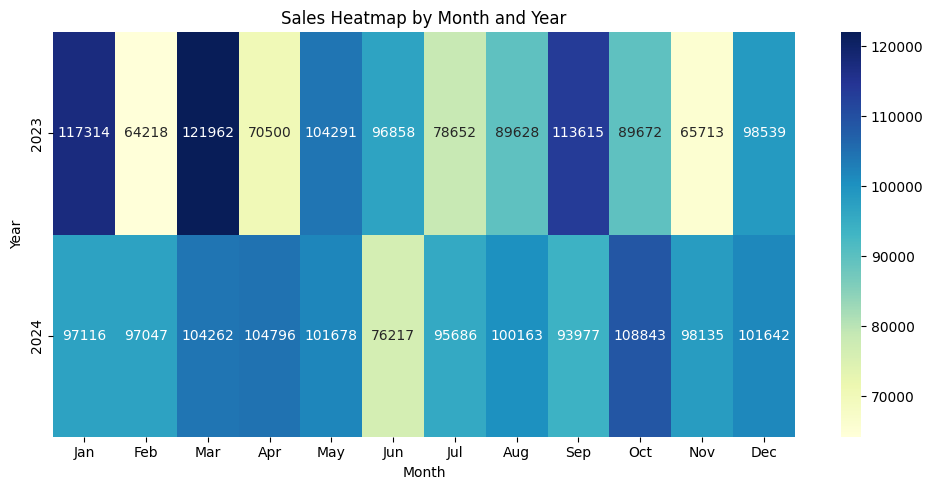

In [31]:


df["month_num"] = df["order_date"].dt.month
heat_data = df.groupby(["year", "month_num"])["total_price"].sum().unstack(fill_value=0)
heat_data.columns = [calendar.month_abbr[m] for m in heat_data.columns]

plt.figure(figsize=(10, 5))
sns.heatmap(heat_data, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Sales Heatmap by Month and Year")
plt.xlabel("Month")
plt.ylabel("Year")
plt.tight_layout()
plt.show()

In [36]:
if "product" in df.columns:
    best_per_month = df.groupby([df["month"], "product"])["total_price"].sum().reset_index()
    best_per_month = best_per_month.loc[best_per_month.groupby("month")["total_price"].idxmax()]
    print(best_per_month)

         month     product  total_price
8   2023-01-01      Laptop     36591.07
32  2023-02-01  Smartphone     11603.32
48  2023-03-01      Laptop     36386.59
73  2023-04-01  Smartwatch     11045.06
88  2023-05-01      Laptop     39482.10
111 2023-06-01  Smartphone     31505.83
127 2023-07-01      Laptop     12162.36
146 2023-08-01      Laptop     22014.56
165 2023-09-01      Laptop     35672.57
189 2023-10-01  Smartphone     26577.93
200 2023-11-01        Desk     11028.71
235 2023-12-01    Wardrobe     23812.50
244 2024-01-01      Laptop     34949.56
264 2024-02-01      Laptop     21352.87
286 2024-03-01  Smartphone     35173.70
301 2024-04-01      Laptop     33534.16
321 2024-05-01      Laptop     31189.07
343 2024-06-01  Smartphone     14805.66
358 2024-07-01      Laptop     30010.84
385 2024-08-01      Tablet     27169.97
408 2024-09-01    Wardrobe     19514.17
421 2024-10-01  Smartphone     28955.90
437 2024-11-01      Laptop     27513.44
461 2024-12-01  Smartphone     29764.87
